In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print (tf.__version__)

2.17.0


In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
#checking for dupilicates
df.duplicated().sum()

0

In [ ]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# List the columns to encode based on 'object' dtype
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded dataset
print(df.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1  


<Axes: >

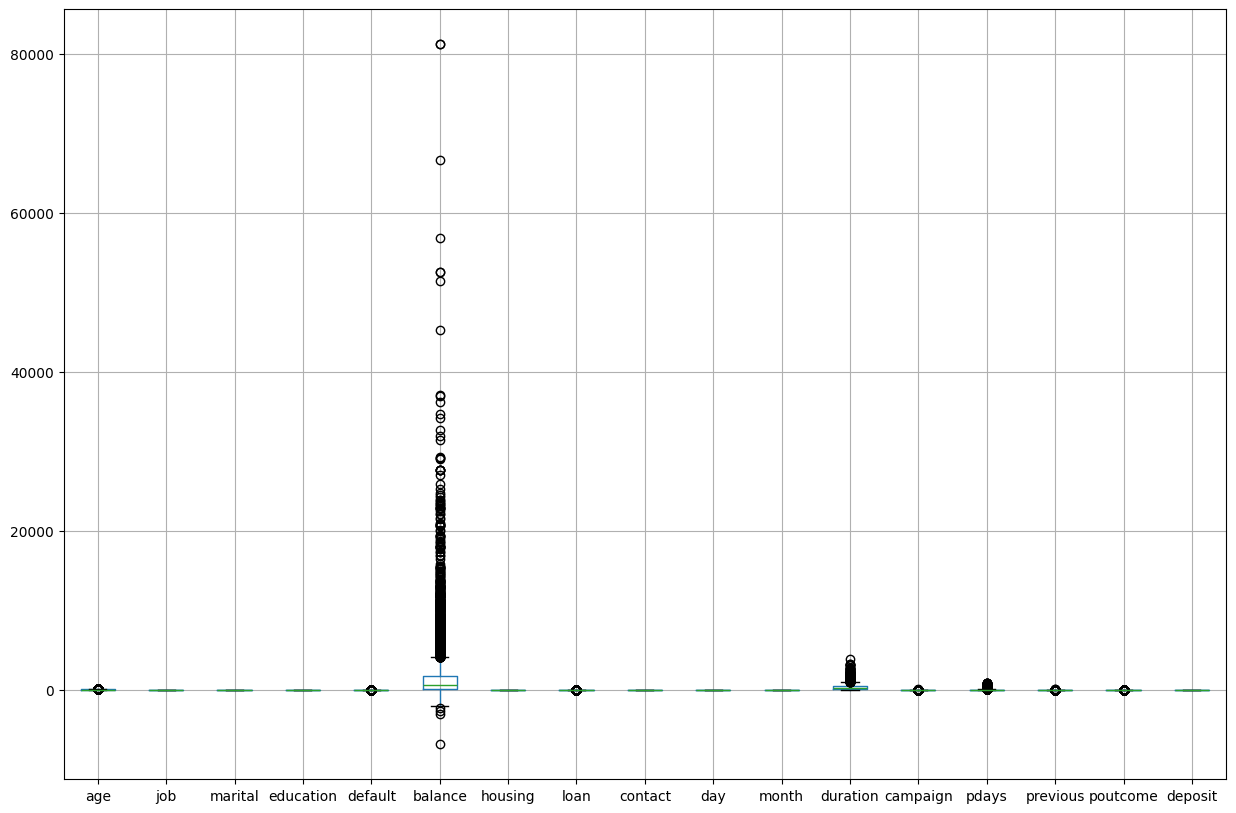

In [ ]:
#checking for outliers using box plots
plt.figure(figsize=(15,10))
df.boxplot()

In [ ]:
#found no reason to cap the outliers since they were all relevant

'range_col' not found in numerical columns.


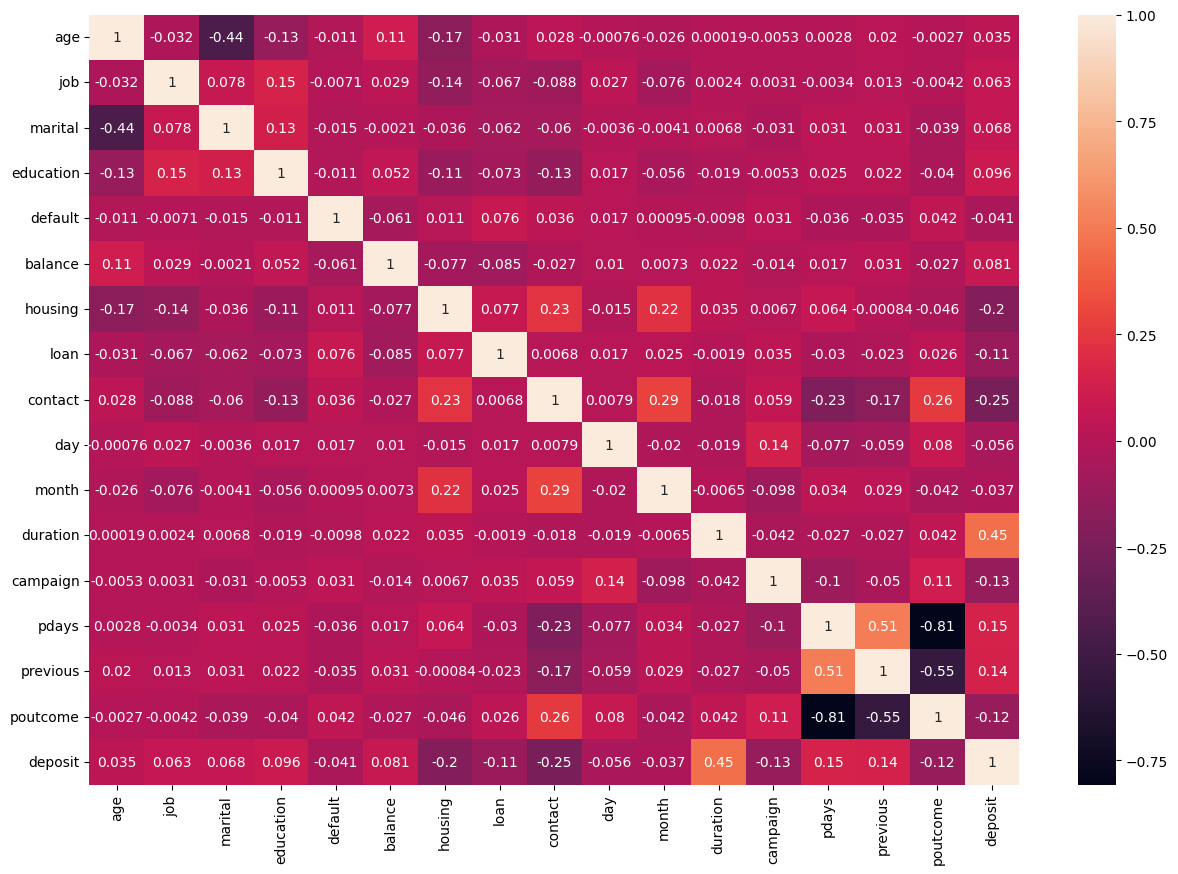

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'range_col' is the column with Interval objects
# Selects only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Check if 'range_col' is in the DataFrame before dropping
if 'range_col' in numerical_df.columns:
    numerical_df = numerical_df.drop(columns=['range_col']) # Drop if it exists
    print("'range_col' dropped successfully.")
else:
    print("'range_col' not found in numerical columns.")

# Calculate correlations on the filtered DataFrame
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [ ]:

# Convert columns with Interval objects to numeric before calculating correlation
for column in df.select_dtypes(include=['category']):  # Select category columns, often containing Intervals
    df[column] = df[column].cat.codes  # Convert to numeric codes

correlations = df.corr()['deposit'].drop('deposit')  # Drop self-correlation

# Set a correlation threshold
threshold = 0.05
highly_correlated = correlations[abs(correlations) > threshold]

# Display the highly correlated columns with 'deposit'
print("Highly correlated columns with 'deposit':")
print(highly_correlated)

Highly correlated columns with 'deposit':
job          0.063395
marital      0.067610
education    0.095948
balance      0.081129
housing     -0.203888
loan        -0.110580
contact     -0.249847
day         -0.056326
duration     0.451919
campaign    -0.128081
pdays        0.151593
previous     0.139867
poutcome    -0.122369
Name: deposit, dtype: float64


In [ ]:
#divide the data into independent and dependent features
X=df.drop(columns=['deposit'])
y=df['deposit']

In [ ]:
#Splitt the data to traain and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.64941897, -0.15019091, -0.30765462, ..., -0.48428507,
        -0.35888264,  0.52269265],
       [ 1.48737591,  0.15923563, -1.90849849, ..., -0.48428507,
        -0.35888264,  0.52269265],
       [-0.69131213, -1.07847054, -0.30765462, ..., -0.48428507,
        -0.35888264,  0.52269265],
       ...,
       [-0.43992505,  2.01579489, -0.30765462, ..., -0.48428507,
        -0.35888264,  0.52269265],
       [-0.85890352, -1.38789708, -0.30765462, ..., -0.48428507,
        -0.35888264,  0.52269265],
       [ 1.57117161,  0.15923563, -0.30765462, ..., -0.48428507,
        -0.35888264,  0.52269265]])

In [ ]:
X_test

array([[-0.02094658,  0.77808872, -0.30765462, ...,  2.61598774,
         0.48684529, -2.47289313],
       [ 1.23598883,  1.3969418 , -0.30765462, ...,  1.29124209,
         1.33257322, -0.47583595],
       [-0.94269921,  0.77808872,  1.29318926, ..., -0.48428507,
        -0.35888264,  0.52269265],
       ...,
       [-0.52372074,  1.70636835, -0.30765462, ..., -0.48428507,
        -0.35888264,  0.52269265],
       [ 0.98460175, -1.38789708,  1.29318926, ..., -0.48428507,
        -0.35888264,  0.52269265],
       [-0.10474227,  0.77808872, -0.30765462, ..., -0.48428507,
        -0.35888264,  0.52269265]])

In [ ]:
X_train.shape

(8929, 16)

In [ ]:
X_test.shape

(2233, 16)

In [ ]:
#creating the ANN
from tensorflow.keras.models import Sequential #
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
#ANN initialization
classifier=Sequential()

In [ ]:
#add the input layer
classifier.add(Dense(units=11,activation='relu'))


In [ ]:
#add the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#add the second hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# adding the output layer
#used sigmoid since it is a binary classification

classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#train the neural network
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#specify the learnig rate for adam optimizer
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001,)

In [ ]:
#early stopping("It stops training when a monitored metric has stopped improving. ")
import tensorflow as tf
from tensorflow import keras

early_stopping= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
#Fit the model
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5611 - loss: 0.6809 - val_accuracy: 0.7384 - val_loss: 0.5351
Epoch 2/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7424 - loss: 0.5343 - val_accuracy: 0.7808 - val_loss: 0.4761
Epoch 3/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7788 - loss: 0.4890 - val_accuracy: 0.7940 - val_loss: 0.4552
Epoch 4/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7976 - loss: 0.4747 - val_accuracy: 0.7971 - val_loss: 0.4451
Epoch 5/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7989 - loss: 0.4675 - val_accuracy: 0.8035 - val_loss: 0.4399
Epoch 6/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7972 - loss: 0.4658 - val_accuracy: 0.8012 - val_loss: 0.4367
Epoch 7/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4618 - val_accuracy: 0.8025 - val_loss: 0.4335
Epoch 8/1000
599/599 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8095 - loss: 0.4543 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

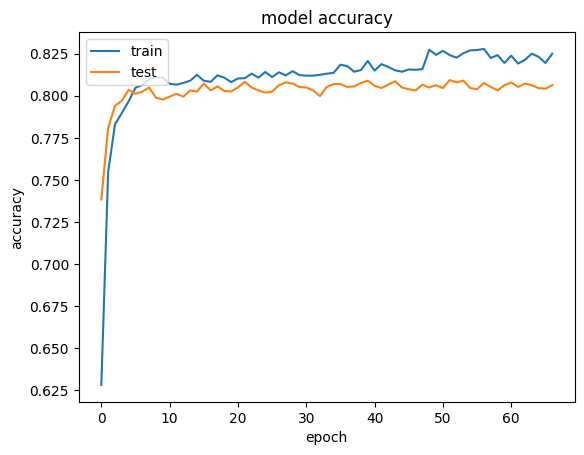

In [ ]:
#plot to show model accuracy via plots

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

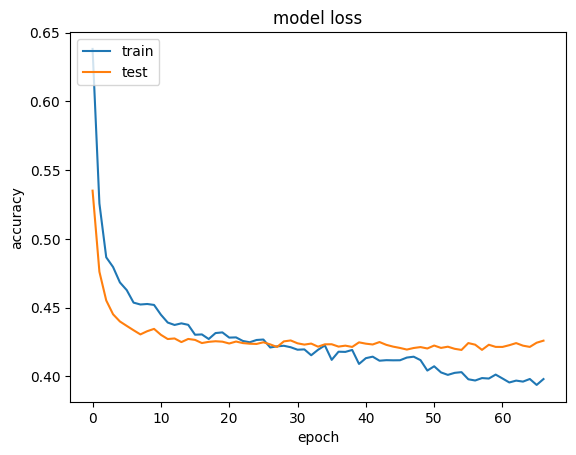

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#get the weights
classifier.get_weights()

[array([[-2.11724833e-01,  2.20936507e-01, -6.51621073e-02,
         -1.41163349e-01, -4.50583361e-02,  1.81489438e-01,
         -1.56439796e-01, -1.11531413e+00, -8.90882686e-02,
          9.52481700e-04, -3.45645279e-01],
        [-2.62889713e-01,  1.30857620e-02, -5.26176572e-01,
         -6.08333461e-02,  1.25956029e-01,  1.21630982e-01,
          3.54339369e-02, -1.76988751e-01, -6.26515895e-02,
         -1.86350852e-01,  2.76647270e-01],
        [ 2.16340244e-01, -4.53288943e-01,  1.20817065e-01,
         -4.49770465e-02, -1.55295774e-01, -1.07965037e-01,
          2.01379165e-01, -6.40506372e-02, -1.89569816e-01,
         -2.08645090e-02,  4.54627693e-01],
        [-2.35326320e-01,  2.19286263e-01,  6.38823491e-03,
          7.72257596e-02,  1.80445313e-01, -1.48047179e-01,
          4.37223136e-01,  1.73205823e-01, -1.01820551e-01,
          2.16635149e-02,  9.21041220e-02],
        [ 1.91497877e-01, -7.23631263e-01,  2.34446347e-01,
         -9.75747108e-01, -1.87983915e-01, -

In [ ]:
#making the prediction for the test data
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[945, 260],
       [182, 846]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8020600089565607